In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

In [79]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

data=pd.DataFrame(faces['data'])
imges=faces['images']
target=faces['target']
shape=imges.shape
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

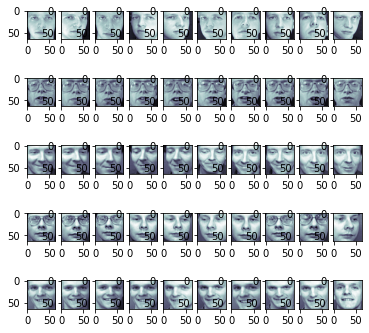

In [30]:
fig, axes = plt.subplots(5, 10, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
plt.show()

In [71]:
def split(data, target):
    train_data, test_data, train_target, test_target = train_test_split(data, target)
    return train_data, test_data, train_target, test_target
train_data, test_data, train_target, test_target = split(data, target)

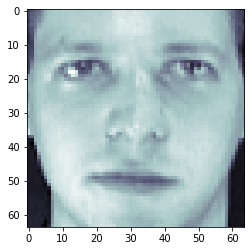

In [51]:
def img_show(data,x=1,y=1):
    fig, axes = plt.subplots(x, y)
    if data.shape !=(64,64) and data.shape!=(4096,):
        
        for i, ax in enumerate(axes.flat):
            ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
        plt.show()
    else:
        plt.imshow(np.array(data).reshape(64, 64), cmap='bone')   

img_show(data.T[0])

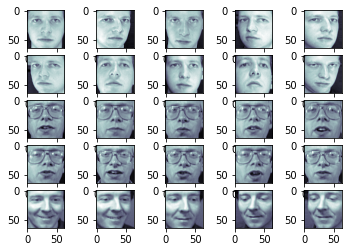

In [52]:
img_show(data,5,5)

In [80]:
def pcatrain(data,threshhoold):
    pca_raw = PCA().fit(data)   
    pca = PCA(n_components=len(np.where(pca_raw.explained_variance_ratio_.cumsum() > threshhoold))).fit(data)
    return pca, pca_raw.explained_variance_ratio_.cumsum()

[[ -6.241536  ]
 [ -0.40760827]
 [ -5.041661  ]
 [ -5.1821604 ]
 [ -3.5788634 ]
 [ -5.69993   ]
 [ -5.9906964 ]
 [ -5.9028587 ]
 [ -7.0375586 ]
 [ -1.7814949 ]
 [ -0.91865003]
 [ -0.4636005 ]
 [ -0.2312181 ]
 [  0.9011842 ]
 [ -0.4443629 ]
 [  0.4082244 ]
 [  1.1439924 ]
 [  0.6136951 ]
 [  1.0740824 ]
 [ -0.03000011]
 [  2.915425  ]
 [  2.9811873 ]
 [  2.7313423 ]
 [  2.1709967 ]
 [  1.4986517 ]
 [ -0.59718084]
 [ -2.8197536 ]
 [ -2.216772  ]
 [ -2.8769832 ]
 [ -2.3500297 ]
 [ -0.24890314]
 [  0.9065603 ]
 [  0.24634746]
 [ -3.7453346 ]
 [ -2.309669  ]
 [ -4.3578405 ]
 [ -4.499779  ]
 [ -0.5961931 ]
 [  1.4512771 ]
 [ -1.0991639 ]
 [ -0.6217968 ]
 [  1.3848937 ]
 [  2.3427238 ]
 [ -0.56349885]
 [ -4.6697254 ]
 [ -3.7740536 ]
 [ -1.3464435 ]
 [ -2.2725334 ]
 [ -4.1872864 ]
 [ -6.0562572 ]
 [ -4.0904226 ]
 [ -4.0840096 ]
 [ -4.73636   ]
 [ -9.776331  ]
 [-10.28554   ]
 [-10.860598  ]
 [-10.6300335 ]
 [-10.083737  ]
 [-10.344307  ]
 [-10.161982  ]
 [ -4.9174137 ]
 [ -1.9891826 ]
 [ -5.77

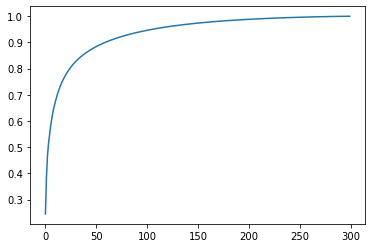

In [81]:
trained=pcatrain(train_data,0.9)[0].transform(data)
print(trained)
plt.plot(pcatrain(train_data,0.9)[1])

In [72]:
for i in range(6):
    ax = fig2.add_subplot(1,6 , i + 1, xticks=[], yticks=[])
    ax.imshow(pca2.components_[i].reshape(size),
              cmap='gray')

ValueError: X.shape[1] = 300 should be equal to 1, the number of features at training time

In [82]:
test_data.shape

(100, 4096)